<a href="https://colab.research.google.com/github/nafl13/ICT_Internship/blob/day3/InternshipD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/beer-servings (2).csv')
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,Afghanistan,0.0,0.0,0.0,0.0
1,1.0,Albania,89.0,132.0,54.0,4.9
2,2.0,Algeria,25.0,0.0,14.0,0.7
3,3.0,Andorra,245.0,138.0,312.0,12.4
4,4.0,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...,...
189,189.0,Vietnam,111.0,2.0,1.0,2.0
190,190.0,Yemen,6.0,0.0,0.0,0.1
191,191.0,Zambia,32.0,19.0,4.0,2.5
192,192.0,Zimbabwe,64.0,18.0,4.0,4.7


In [ ]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,Afghanistan,0.0,0.0,0.0,0.0
1,1.0,Albania,89.0,132.0,54.0,4.9
2,2.0,Algeria,25.0,0.0,14.0,0.7
3,3.0,Andorra,245.0,138.0,312.0,12.4
4,4.0,Angola,217.0,57.0,45.0,5.9


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.0,0.0,0.0,0.0
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,0.0,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,0.0,0.0,0.1
191,Zambia,32.0,19.0,4.0,2.5
192,Zimbabwe,64.0,18.0,4.0,4.7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.7+ KB


In [ ]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
data.isna().sum()

country                         1
beer_servings                   9
spirit_servings                 9
wine_servings                   7
total_litres_of_pure_alcohol    2
dtype: int64

In [ ]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [ ]:
data.shape

(194, 5)

**filling the missing data**

In [ ]:
num_cols=data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [ ]:
num_cols.isna().sum()

beer_servings                   9
spirit_servings                 9
wine_servings                   7
total_litres_of_pure_alcohol    2
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
imputer =imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [ ]:
num_cols = pd.DataFrame(num_cols, columns=[['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']])

In [ ]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [ ]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol'],axis=1, inplace=True)

In [ ]:
data= pd.concat([num_cols,data],axis=1)


In [ ]:
data

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country
0,0.000000,0.000000,0.000000,0.000000,Afghanistan
1,89.000000,132.000000,54.000000,4.900000,Albania
2,25.000000,0.000000,14.000000,0.700000,Algeria
3,245.000000,138.000000,312.000000,12.400000,Andorra
4,217.000000,57.000000,45.000000,5.900000,Angola
...,...,...,...,...,...
189,111.000000,2.000000,1.000000,2.000000,Vietnam
190,6.000000,0.000000,0.000000,0.100000,Yemen
191,32.000000,19.000000,4.000000,2.500000,Zambia
192,64.000000,18.000000,4.000000,4.700000,Zimbabwe


In [ ]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country
0,0.0,0.0,0.0,0.0,Afghanistan
1,89.0,132.0,54.0,4.9,Albania
2,25.0,0.0,14.0,0.7,Algeria
3,245.0,138.0,312.0,12.4,Andorra
4,217.0,57.0,45.0,5.9,Angola


In [ ]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (beer_servings,)                 194 non-null    float64
 1   (spirit_servings,)               194 non-null    float64
 2   (wine_servings,)                 194 non-null    float64
 3   (total_litres_of_pure_alcohol,)  194 non-null    float64
 4   country                          193 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.7+ KB


In [ ]:
freqgraph = data.select_dtypes(include=['float'])


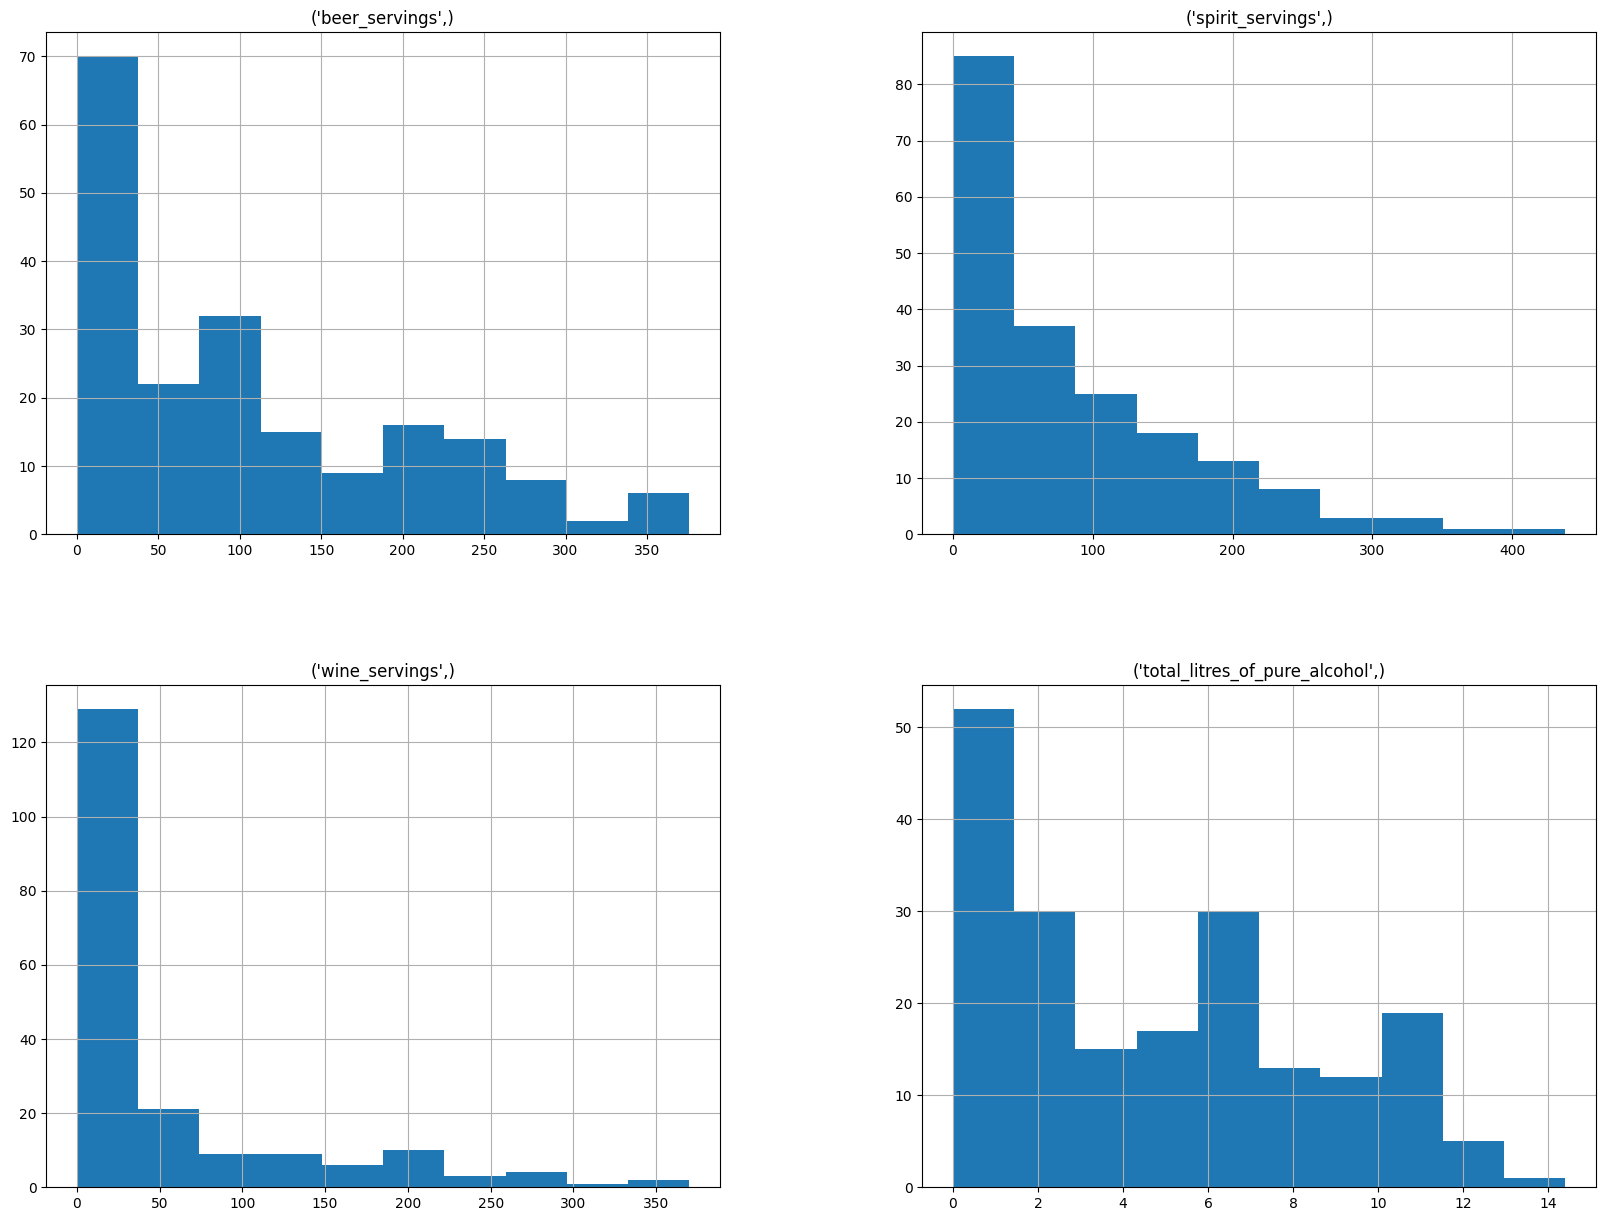

In [ ]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data= pd.read_csv('/content/beer-servings (2).csv')


In [ ]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())

In [ ]:
data.beer_servings.isna().sum()


0

In [ ]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
  data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

Unnamed: 0                      1
country                         1
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [ ]:
data.groupby('continent')['beer_servings'].mean()


KeyError: ignored

In [ ]:
data.country.nunique()

In [ ]:
data.drop('country',axis=1, inplace=True)

In [ ]:
data.shape

In [ ]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
  plt.figure()
  plt.boxplot(das ta[i])
  plt.title(i)

In [ ]:
q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [ ]:
print(q1)
print(q2)
print(q3)

In [ ]:
data['spirit_servings'].median()

In [ ]:

IQR=q3-q1

In [ ]:
IQR


In [ ]:
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

In [ ]:
low_lim

In [ ]:
up_lim

In [ ]:
outlier=[]
for x in data['spirit_servings']:
  if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

In [ ]:
ind1 = data['spirit_servings']<low_lim
data.loc[ind1].index

In [ ]:
ind2 = data['spirit_servings']>up_lim
data.loc[ind2].index

In [ ]:
ind2

In [ ]:
data.drop([15, 68, 73, 141, 144], inplace=True)

In [ ]:
data.head(20)


In [ ]:
plt.boxplot(data['spirit_servings'])
plt.title

In [ ]:
data['wine_servings'] = data['wine_servings'].fillna(data['wine_servings'].median())

In [ ]:
data.wine_servings.isna().sum()


In [ ]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
  data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

In [ ]:
data.groupby('continent')['wine_servings'].mean()


In [ ]:
data.shape

In [ ]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [ ]:
q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [ ]:
print(q1)
print(q2)
print(q3)

In [ ]:
data['wine_servings'].median()

In [ ]:

IQR=q3-q1

In [ ]:
IQR


In [ ]:
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

In [ ]:
low_lim

In [ ]:
up_lim

In [ ]:
outlier=[]
for x in data['wine_servings']:
  if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

In [ ]:
ind1 = data['wine_servings']<low_lim
data.loc[ind1].index

In [ ]:
ind2 = data['wine_servings']>up_lim
data.loc[ind2].index

In [ ]:
ind2

In [ ]:
data.drop([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67, 75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185], inplace=True)

In [ ]:
data.head(20)


In [ ]:
plt.boxplot(data['wine_servings'])
plt.title

In [ ]:
data1=pd.read_csv('/content/medals_by_country_2016 (1).csv')
data1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot()
plt.show()

In [ ]:
data1=data1.rename(columns={'Unnamed: 0':'Country'})

In [ ]:
data1.head()

In [ ]:
plt.bar(data1['Country'],data['Gold'])

In [ ]:
plt.bar(data1['Country'],data1['Gold']) 
plt.xticks(rotation=90) 
plt.show()

In [ ]:
data1['Gold'].plot.bar()

In [ ]:
data1 = data1.set_index('Country')

In [ ]:
data1['Gold'].plot.bar()

In [ ]:
data1['Gold'].sort_values(ascending=False).plot.bar()

In [ ]:
data1[['Gold','Silver','Bronze']].plot.bar()

In [ ]:
countries=['ind','us','can','uae']
pop=[123,123,123,123]
plt.pie(pop, labels=countries)
plt.show(
    
)

**ASSIGNMENT_DAY_3**

In [ ]:
data= pd.read_csv('/content/dataset/Tokyo Medals 2021.csv')
data

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
...,...,...,...,...,...,...
88,Ghana,0,0,1,1,77
89,Grenada,0,0,1,1,77
90,Kuwait,0,0,1,1,77
91,Republic of Moldova,0,0,1,1,77


In [ ]:
data.isna().sum()

Country          0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank By Total    0
dtype: int64

In [ ]:
freqgraph = data.select_dtypes(include=['float'])

In [ ]:

plt.show()

In [ ]:
data.Country.nunique()

93

In [ ]:
data.drop('Country',axis=1, inplace=True)
data